In [1]:
import logging
import os
import matplotlib.pyplot as plt
import pandas as pd
from ocean_navigation_simulator.problem_factories.Constructor import (
    Constructor,
)
import yaml
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
from ocean_navigation_simulator.utils.misc import get_c3
import os
from ocean_navigation_simulator.utils.plotting_utils import set_palatino_font, set_palatino_font_plotly
set_palatino_font("ocean_navigation_simulator/package_data/font/Palatino_thin.ttf")
set_palatino_font_plotly("ocean_navigation_simulator/package_data/font/Palatino_thin.ttf")

Layout({
    'font': {'family': 'Palatino', 'size': 21},
    'legend': {'font': {'family': 'Palatino', 'size': 25}},
    'title': {'font': {'family': 'Palatino', 'size': 30}},
    'xaxis': {'tickfont': {'family': 'Palatino', 'size': 13}, 'title': {'font': {'family': 'Palatino', 'size': 25}}},
    'yaxis': {'tickfont': {'family': 'Palatino', 'size': 13}, 'title': {'font': {'family': 'Palatino', 'size': 25}}}
})

In [3]:
c3 = get_c3()

Starting to connect to c3


In [4]:
experiment_name = "30_platforms_HC_HC_col_100m"
exp = c3.Experiment.get(experiment_name)
exp

c3.Experiment(
 id='30_platforms_HC_HC_col_100m',
 meta=c3.Meta(
        tenantTagId=32,
        tenant='seaweed-control',
        tag='devseaweedrc1',
        created=datetime.datetime(2023, 3, 10, 23, 3, 11, tzinfo=datetime.timezone.utc),
        createdBy='mariuswiggert@berkeley.edu',
        updated=datetime.datetime(2023, 3, 10, 23, 3, 11, tzinfo=datetime.timezone.utc),
        updatedBy='mariuswiggert@berkeley.edu',
        timestamp=datetime.datetime(2023, 3, 10, 23, 3, 11, tzinfo=datetime.timezone.utc),
        fetchInclude='[]',
        fetchType='Experiment'),
 version=1,
 experimentName='30_platforms_HC_HC_col_100m',
 description='multi agent',
 arenaConfig={'casadi_cache_dict': {'deg_around_x_t': 2.0,
                                     'time_around_x_t': 432000},
               'multi_agent_constraints': {'collision_thrsld': 0.1,
                                           'communication_thrsld': 9,
                                           'epsilon_margin': 0.3,
        

In [5]:
import re
def extract_number(string):
    pattern = re.compile(r"_(\d+)$")
    match = pattern.search(string)
    if match:
        return int(match.group(1))
    else:
        return None

In [6]:
all_controllers = exp.get('controllers').controllers
for controller in all_controllers:
    print(controller.get("name").name)
ctrl = all_controllers[6]
print("chosen control is: ", ctrl.get("name").name)

flocking_0_1
flocking_0_5
flocking_1
flocking_softmax_0_5
flocking_standard_0_5
flocking_standard_1
hj_naive
reactive_ctrl
chosen control is:  hj_naive


In [7]:
OceanSimObj_lists = []
metrics_dict = {}
controller = 'controllerSetting==' + '"' + ctrl.id + '"'
status = ' && status ==' + '"' + 'finished_running' + '"'
#termination_reason = ' && terminationReason ==' + '"' + 'Timeout' + '"'
OceanSimObj_lists=c3.OceanSimRun.fetch(spec={'include': "[this]",
                                        'filter': controller + status,
                                        'order': "ascending(mission.id)"
                                                    }
                                ).objs

mission_ids = []

In [8]:
from tqdm import tqdm
for run, i in zip(OceanSimObj_lists, tqdm(range(len(OceanSimObj_lists)))):
    run_id = extract_number(run.get("mission").mission.id)
    if run_id == 343:
        state_traj = c3.HycomUtil.get_traj_dict(run, local_folder="tmp/test")["sim_traj"]
        break


 39%|███▉      | 466/1181 [00:21<00:32, 22.08it/s]


In [82]:
# mission 343 
state_traj

array([[[-8.88599777e+01, -8.88584736e+01, -8.88569162e+01, ...,
         -8.78698357e+01, -8.78698508e+01, -8.78698794e+01],
        [ 2.81982861e+01,  2.81974147e+01,  2.81965143e+01, ...,
          2.79597625e+01,  2.79599134e+01,  2.79600730e+01],
        [ 1.65791637e+09,  1.65791697e+09,  1.65791757e+09, ...,
          1.65843357e+09,  1.65843417e+09,  1.65843477e+09],
        ...,
        [ 1.00000000e+02,  1.00000000e+02,  1.00000000e+02, ...,
          1.00000000e+02,  1.00000000e+02,  1.00000000e+02],
        [ 2.41803581e-01,  2.45674294e-01,  2.54360739e-01, ...,
         -8.39339950e-04, -2.46440037e-03, -4.69431018e-03],
        [-6.15655212e-02, -1.61490581e-01, -1.66856675e-01, ...,
          2.68855259e-02,  2.79519844e-02,  2.95918567e-02]],

       [[-8.89314499e+01, -8.89297264e+01, -8.89279413e+01, ...,
         -8.78519757e+01, -8.78519883e+01, -8.78520129e+01],
        [ 2.81690178e+01,  2.81677017e+01,  2.81663512e+01, ...,
          2.79598106e+01,  2.79600454e

In [9]:
# Controller Configs
HJMultiTimeConfig = {
    "replan_every_X_seconds": None,
    "replan_on_new_fmrc": True,
    "T_goal_in_seconds": 3600 * 24 * 7,  # 3d, 43200,     # 12h
    "accuracy": "high",
    "artificial_dissipation_scheme": "local_local",
    "ctrl_name": "ocean_navigation_simulator.controllers.hj_planners.HJReach2DPlanner.HJReach2DPlanner",
    "d_max": 0.0,
    "deg_around_xt_xT_box": 1.0,
    "direction": "multi-time-reach-back",
    "grid_res": 0.02,
    "n_time_vector": 200,
    "progress_bar": True,
    "use_geographic_coordinate_system": True,
}
StraightLineConfig = {
    "ctrl_name": "ocean_navigation_simulator.controllers.NaiveController.NaiveController"
}
flockingConfig = {
    "unit": "km",
    "interaction_range": 9,  # km
    "grad_clip_range": 0.1,  # km
    "hysteresis": 0.3,
    "epsilon": 0.5,
}
reactiveConfig = {
    "unit": "m",
    "mix_ttr_and_euclidean": True,
    "delta_3": 8800,  # collision threshold (communication - delta_3)
    "delta_2": 2000,  # safe zone threshold  ]communication - delta_2, communication - delta_3[
    "delta_1": 500,  # small threshold so that if distance > communication_thrsld- delta_1 we try to achieve connectivity
    "communication_thrsld": 9000,
    "k_1": 0.25,
    "k_2": 1,
}
MultiAgentCtrlConfig = {
    "ctrl_name": "ocean_navigation_simulator.controllers.MultiAgentPlanner.MultiAgentPlanner",
    "high_level_ctrl": "hj_naive",  # choose from hj_naive, flocking, reactive_control
    "unit": "km",
    "communication_thrsld": 9,
    "hj_specific_settings": HJMultiTimeConfig,
    "flocking_config": flockingConfig,
    "reactive_control_config": reactiveConfig,
}

In [10]:
import yaml
import yaml
with open('config.yaml', 'r') as file:
    configFull = yaml.safe_load(file)
missionConfig = configFull['missionConfig']['value']
print(missionConfig)

{'feasible': True, 'multi_agent': True, 'seed': None, 'target_radius': 0.25, 'ttr_in_h': 127.20347070764753, 'x_0': [{'date_time': '2022-07-15T20:19:33+00:00', 'lat': 28.198286056518555, 'lon': -88.85997772216797}, {'date_time': '2022-07-15T20:19:33+00:00', 'lat': 28.169017791748047, 'lon': -88.93144989013672}, {'date_time': '2022-07-15T20:19:33+00:00', 'lat': 28.123735427856445, 'lon': -88.93584442138672}, {'date_time': '2022-07-15T20:19:33+00:00', 'lat': 28.069772720336914, 'lon': -88.98153686523438}, {'date_time': '2022-07-15T20:19:33+00:00', 'lat': 28.168127059936523, 'lon': -88.8812484741211}, {'date_time': '2022-07-15T20:19:33+00:00', 'lat': 28.035158157348633, 'lon': -88.96973419189453}, {'date_time': '2022-07-15T20:19:33+00:00', 'lat': 28.183242797851562, 'lon': -88.79122161865234}, {'date_time': '2022-07-15T20:19:33+00:00', 'lat': 28.083194732666016, 'lon': -88.87967681884766}, {'date_time': '2022-07-15T20:19:33+00:00', 'lat': 28.022216796875, 'lon': -88.8958969116211}, {'date

In [11]:
# Settings for where the problem is saved
my_path = os.getcwd()
mission_nr = 343
save_in_folder = os.path.join(my_path, "generated_media/plots_for_cdc/" + f"mission_nr_{mission_nr}")
os.makedirs(save_in_folder, exist_ok=True)

NoObserver = {"observer": None}

In [23]:
objective_conf = {"type": "nav"}
arenaConfig = {
    "casadi_cache_dict": {"deg_around_x_t": 0.5, "time_around_x_t": 86400.0},
    "ocean_dict": {
        "hindcast": {
            "field": "OceanCurrents",
            "source": "hindcast_files",
            "source_settings": {
                "folder": "data/miss_gen_hindcast/",
                "local": False,
                "source": "HYCOM",
                "type": "hindcast",
                "currents": "total",
                "region": "GOM",
                # "region": "Region 1",
            },
        },
        "forecast": None,  # {
        #     "field": "OceanCurrents",
        #     "source": "forecast_files",
        #     "source_settings": {
        #         "folder": "data/miss_gen_forecast/",
        #         "local": False,
        #         "source": "Copernicus",
        #         "type": "forecast",
        #         "currents": "total",
        #         "region": "GOM",
        #     },
        # },
        # "forecast": {
        #     "field": "OceanCurrents",
        #     "source": "hindcast_as_forecast_files",
        #     "source_settings": {
        #         "folder": "data/miss_gen_forecast/",
        #         "local": False,
        #         "source": "Copernicus",
        #         "type": "hindcast",
        #         "currents": "total",
        #         "region": "GOM",
        #     },
        #     "forecast_length_in_days": 5,
        # },
    },
    "platform_dict": {
        "battery_cap_in_wh": 400.0,
        "drag_factor": 675.0,
        "dt_in_s": 600.0,
        "motor_efficiency": 1.0,
        "solar_efficiency": 0.2,
        "solar_panel_size": 0.5,
        "u_max_in_mps": 0.1,
    },
    "seaweed_dict": {"forecast": None, "hindcast": None},
    "solar_dict": {"forecast": None, "hindcast": None},
    "spatial_boundary": None,
    "use_geographic_coordinate_system":True,
    "timeout": 3600 * 24 * 6,  # CHANGE TIMOUT HERE
    "multi_agent_constraints": {
        "unit": "km",
        "communication_thrsld": 9,
        "epsilon_margin": 0.3,  # when add edges based on hysteresis
        "collision_thrsld": 0.2,
    },
}

In [24]:
# Step 0: Create Constructor object which contains arena, problem, controller and observer
constructor = Constructor(
    arena_conf=arenaConfig,
    mission_conf=missionConfig,
    objective_conf=objective_conf,
    ctrl_conf=MultiAgentCtrlConfig,  # here different controller configs can be put in
    observer_conf=NoObserver,  # here the other observers can also be put int
    download_files=True,  # True,,
)
# Step 1.1 Retrieve problem
problem = constructor.problem

#Step 1.2: Retrieve arena
arena = constructor.arena
observation = arena.reset(platform_set=problem.start_state)
problem_status = arena.problem_status(problem=problem)

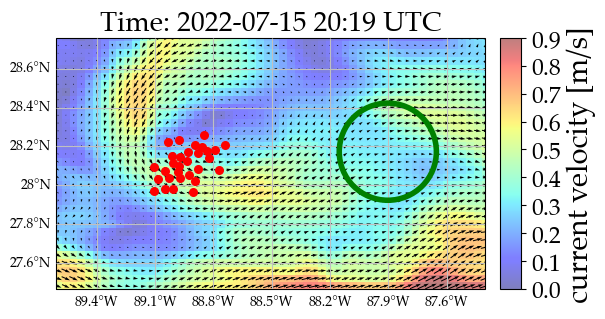

In [58]:
import matplotlib.pyplot as plt

t_interval, lat_bnds, lon_bnds = arena.ocean_field.hindcast_data_source.convert_to_x_y_time_bounds(
    x_0=problem.start_state.to_spatio_temporal_point(),
    x_T=problem.end_region,
    deg_around_x0_xT_box=0.5,
    temp_horizon_in_s=3600,
)

ax = arena.ocean_field.hindcast_data_source.plot_data_at_time_over_area(
    time=problem.start_state.date_time[0],
    x_interval=lon_bnds,
    y_interval=lat_bnds,
    return_ax=True,
    vmax=0.9,
)
# Adjust the axes limits to remove margin
ax.set_xlim(lon_bnds[0], lon_bnds[-1])
ax.set_ylim(lat_bnds[0], lat_bnds[-1])
problem.plot(ax=ax)
plt.show()
# fig= plt.figure()
# cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
# plt.colorbar(cax=cax)
# ax.get_figure().show()

In [27]:
from ocean_navigation_simulator.environment.PlatformState import (
    PlatformStateSet,
)
arena.state_trajectory = state_traj
for t in range(state_traj.shape[2]):
    platform_set = PlatformStateSet.from_numpy(state_traj[:,:,t])
    graph_observation = arena.multi_agent_net.update_graph(platform_set=platform_set)
    arena.multi_agent_G_list.append(graph_observation)

state_traj.shape
#arena.plot_all_on_map(problem=problem, show_control_trajectory=False, margin=0.25, return_ax=True)

(30, 7, 865)

In [36]:
len(arena.multi_agent_G_list)


1729

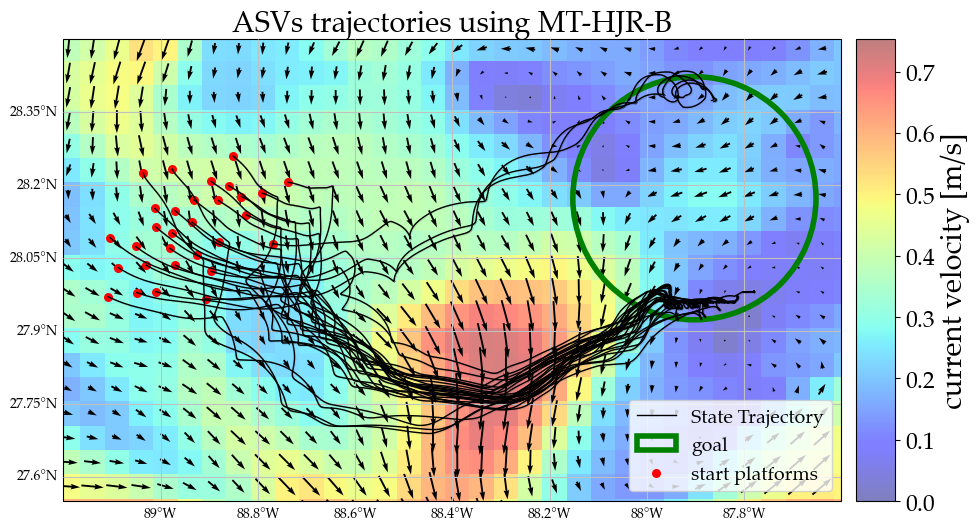

In [59]:
x_interval = [-89.2, -87.6]
y_interval = [27.55, 28.5]
ax = arena.plot_all_on_map(problem=problem, show_control_trajectory=False, margin=0.15, x_interval = x_interval, y_interval=y_interval, quiver_spatial_res=0.05,
        return_ax=True, figsize=(12,6), show_current_position=False)
ax.set_title('ASVs trajectories using MT-HJR-B')
plt.savefig('naive_missions_343.svg')

#arena.plot_all_network_analysis()


In [30]:
all_controllers = exp.get('controllers').controllers
for controller in all_controllers:
    print(controller.get("name").name)
ctrl = all_controllers[3]
print("chosen control is: ", ctrl.get("name").name)

flocking_0_1
flocking_0_5
flocking_1
flocking_softmax_0_5
flocking_standard_0_5
flocking_standard_1
hj_naive
reactive_ctrl
chosen control is:  flocking_softmax_0_5


In [31]:
OceanSimObj_lists = []
metrics_dict = {}
controller = 'controllerSetting==' + '"' + ctrl.id + '"'
status = ' && status ==' + '"' + 'finished_running' + '"'
#termination_reason = ' && terminationReason ==' + '"' + 'Timeout' + '"'
OceanSimObj_lists=c3.OceanSimRun.fetch(spec={'include': "[this]",
                                        'filter': controller + status,
                                        'order': "ascending(mission.id)"
                                                    }
                                ).objs

mission_ids = []

In [32]:
from tqdm import tqdm
for run, i in zip(OceanSimObj_lists, tqdm(range(len(OceanSimObj_lists)))):
    run_id = extract_number(run.get("mission").mission.id)
    if run_id == 343:
        state_traj_flocking = c3.HycomUtil.get_traj_dict(run, local_folder="tmp/test")["sim_traj"]
        break

 40%|███▉      | 467/1170 [00:19<00:29, 23.71it/s]


In [33]:
# Step 0: Create Constructor object which contains arena, problem, controller and observer
constructor = Constructor(
    arena_conf=arenaConfig,
    mission_conf=missionConfig,
    objective_conf=objective_conf,
    ctrl_conf=MultiAgentCtrlConfig,  # here different controller configs can be put in
    observer_conf=NoObserver,  # here the other observers can also be put int
    download_files=True,  # True,,
)
# Step 1.1 Retrieve problem
problem = constructor.problem

#Step 1.2: Retrieve arena
arena_flock = constructor.arena
observation = arena_flock.reset(platform_set=problem.start_state)
problem_status = arena_flock.problem_status(problem=problem)

In [34]:
from ocean_navigation_simulator.environment.PlatformState import (
    PlatformStateSet,
)
arena_flock.state_trajectory = state_traj_flocking
for t in range(state_traj_flocking.shape[2]):
    platform_set = PlatformStateSet.from_numpy(state_traj_flocking[:,:,t])
    graph_observation = arena_flock.multi_agent_net.update_graph(platform_set=platform_set)
    arena_flock.multi_agent_G_list.append(graph_observation)

state_traj_flocking.shape

(30, 7, 865)

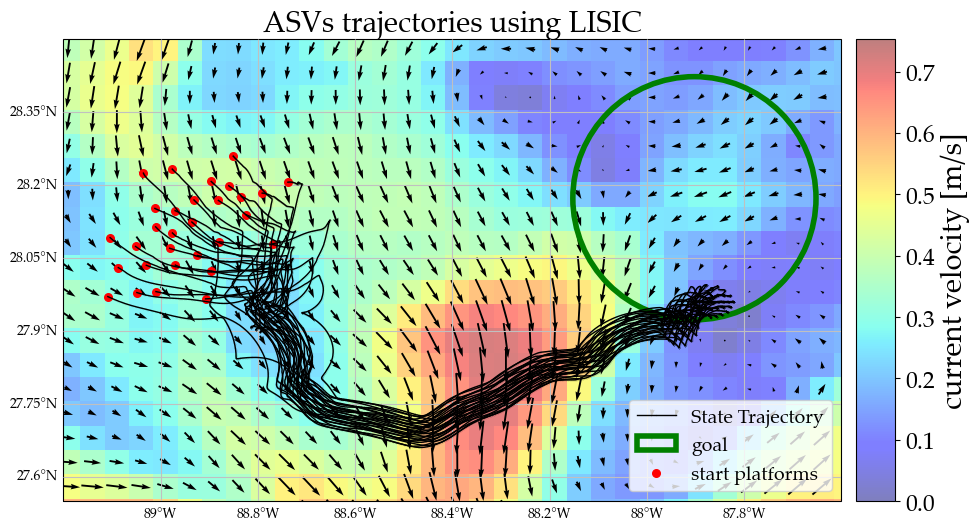

In [56]:
x_interval = [-89.2, -87.6]
y_interval = [27.55, 28.5]
ax = arena_flock.plot_all_on_map(problem=problem, show_control_trajectory=False, margin=0.15, x_interval = x_interval, y_interval=y_interval, quiver_spatial_res=0.05,
        return_ax=True, figsize=(12,6), show_current_position=False)    
ax.set(title='ASVs trajectories using LISIC', xlabel='Longitude', ylabel='Latitude')
# ax.set_title('ASVs trajectories using LISIC')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
#plt.subplots_adjust(left=0.1, right=0.9, bottom=0.8, top=0.9)
plt.savefig('flocking_missions_343.svg')

In [ ]:
# Step 4: Run closed-loop simulation
controller.plot_reachability_snapshot_over_currents(
    rel_time_in_seconds=0,
    granularity_in_h=5,
    alpha_color=1,
    time_to_reach=True,
    fig_size_inches=(12, 12),
    return_ax=True,
)
plt.show()
ctrl_deviation_from_opt = []
solver_times = []
all_pltf_status = [0] * len(missionConfig["x_0"])
min_distances_to_target_over_mission = [np.inf] * len(missionConfig["x_0"])
pb_running_thrsld = 0
# Run until tiemout of until one of the platform has stranded/left arena region (failed)
while not any(status < pb_running_thrsld for status in problem_status):
#for i in range(5):
    # Get action
    action, ctrl_correction, solver_time_step_s = controller.get_action(
        observation=observation
    )  # correction angle in rad
    ctrl_deviation_from_opt.append(ctrl_correction)

    # append solver time
    solver_times.append(solver_time_step_s)
    # execute action
    observation = arena.step(action)

    # Observer data assimilation
    observer.observe(observation)
    observation.forecast_data_source = observer
    # #this replaces the forecast source by Observer (defined as none for now so not a desired behavior)

    # update problem status
    problem_status = arena.problem_status(problem=problem)
    min_distances_to_target_over_mission = arena.get_min_or_max_of_two_lists(
        list_a=min_distances_to_target_over_mission,
        list_b=arena.final_distance_to_target(problem=problem),
        min_or_max="min",
    )
    # for the final metric, look if platform was able to reach target within T, so keep only max (=1 if pltf reached target)
    all_pltf_status = arena.get_min_or_max_of_two_lists(
        list_a=all_pltf_status, list_b=problem_status, min_or_max="max"
    )
print("terminated because:", arena.problem_status_text(arena.problem_status(problem=problem)))


In [ ]:
results_folder = os.path.join(
    save_in_folder, MultiAgentCtrlConfig["high_level_ctrl"]
)
os.makedirs(results_folder, exist_ok=True)

with open(f"{results_folder}/missionConfig.yml", "w") as outfile:
    yaml.dump(missionConfig, outfile, default_flow_style=False)

metrics_dict = arena.save_metrics_to_log(
    all_pltf_status=all_pltf_status,
    min_distances_to_target=min_distances_to_target_over_mission,
    max_correction_from_opt_ctrl=ctrl_deviation_from_opt,
    solver_times=solver_times,
    filename=f"{results_folder}/metrics.log",
)
metrics_df = pd.DataFrame(data=metrics_dict, index=[0])
metrics_df.to_csv(f"{results_folder}/metrics.csv")
arena.animate_trajectory(
    margin=0.1,
    problem=problem,
    temporal_resolution=7200,
    output=f"{results_folder}/trajectory_anim.mp4",
    fps=6,
    ctrl_scale=20,
)

arena.animate_graph_net_trajectory(
    temporal_resolution=7200,
    # collision_communication_thrslds=(10, 50), (not specified take defaut one)
    plot_ax_ticks=True,
    output=f"{results_folder}/network_graph_anim.mp4",
    fps=5,
)

plt.clf()
fig = arena.plot_all_network_analysis(xticks_temporal_res=12 * 3600)  # 8 hours interval for xticks
plt.savefig(f"{results_folder}/graph_properties.png")

plt.clf()
arena.plot_all_on_map(problem=problem, show_control_trajectory=False, margin=0.25, return_ax=True)
plt.savefig(f"{results_folder}/state_trajectory.png")

plt.clf()
arena.plot_distance_evolution_between_platforms()
plt.savefig(f"{results_folder}/distanceEvolution.png")

In [ ]:
#%matplotlib
results_folder = os.path.join(
    save_in_folder, MultiAgentCtrlConfig["high_level_ctrl"]
)
ax = arena.plot_all_on_map(problem=problem, x_interval=[-87.8,-87],
        y_interval=[25.5,26.4],show_current_position =False, show_control_trajectory=False, margin=0.25, return_ax=True,
                vmax=0.9,
                alpha=0.25,
                quiver_scale=30,
                quiver_spatial_res=0.1,
                )
plt.savefig(f"{results_folder}/state_trajectory_zoom_without_current_state_black_alpha_0.25_spatial_res0_05.png", dpi=1200)


# Comparison of datasources

In [ ]:
import logging
import os
import matplotlib.pyplot as plt
import pandas as pd
from ocean_navigation_simulator.problem_factories.Constructor import (
    Constructor,
)
import yaml
import numpy as np
%load_ext autoreload
%autoreload 2
my_path = os.getcwd()
save_in_folder = os.path.join(my_path, "generated_media/plots_for_cdc/")
os.makedirs(save_in_folder, exist_ok=True)

In [ ]:
arenaConfig = {
    "casadi_cache_dict": {"deg_around_x_t": 0.5, "time_around_x_t": 86400.0},
    "ocean_dict": {
        "hindcast": {
            "field": "OceanCurrents",
            "source": "hindcast_files",
            "source_settings": {
                "folder": "data/miss_gen_hindcast/",
                "local": False,
                "source": "HYCOM",
                "type": "hindcast",
                "currents": "total",
                "region": "GOM",
                # "region": "Region 1",
            },
        },
        #"forecast": None,  # {
        #     "field": "OceanCurrents",
        #     "source": "forecast_files",
        #     "source_settings": {
        #         "folder": "data/miss_gen_forecast/",
        #         "local": False,
        #         "source": "Copernicus",
        #         "type": "forecast",
        #         "currents": "total",
        #         "region": "GOM",
        #     },
        # },
        "forecast": {
            "field": "OceanCurrents",
            "source": "hindcast_as_forecast_files",
            "source_settings": {
                "folder": "data/miss_gen_forecast/",
                "local": False,
                "source": "Copernicus",
                "type": "hindcast",
                "currents": "total",
                "region": "GOM",
            },
            "forecast_length_in_days": 10,
        },
    },
    "platform_dict": {
        "battery_cap_in_wh": 400.0,
        "drag_factor": 675.0,
        "dt_in_s": 600.0,
        "motor_efficiency": 1.0,
        "solar_efficiency": 0.2,
        "solar_panel_size": 0.5,
        "u_max_in_mps": 0.35,
    },
    "seaweed_dict": {"forecast": None, "hindcast": None},
    "solar_dict": {"forecast": None, "hindcast": None},
    "spatial_boundary": None,
    "use_geographic_coordinate_system": False,
    "timeout": 3600 * 24 * 4,  # CHANGE TIMOUT HERE
    "multi_agent_constraints": {
        "unit": "km",
        "communication_thrsld": 9,
        "epsilon_margin": 0.3,  # when add edges based on hysteresis
        "collision_thrsld": 0.2,
    },
}
HJMultiTimeConfig = {
    "replan_every_X_seconds": None,
    "replan_on_new_fmrc": True,
    "T_goal_in_seconds": 3600 * 24 * 7,  # 3d, 43200,     # 12h
    "accuracy": "high",
    "artificial_dissipation_scheme": "local_local",
    "ctrl_name": "ocean_navigation_simulator.controllers.hj_planners.HJReach2DPlanner.HJReach2DPlanner",
    "d_max": 0.0,
    "deg_around_xt_xT_box": 1.0,
    "direction": "multi-time-reach-back",
    "grid_res": 0.02,
    "n_time_vector": 200,
    "progress_bar": True,
    "use_geographic_coordinate_system": True,
}
MultiAgentCtrlConfig = {
    "ctrl_name": "ocean_navigation_simulator.controllers.MultiAgentPlanner.MultiAgentPlanner",
    "high_level_ctrl": "hj_naive",  # choose from hj_naive, flocking, reactive_control
    "unit": "km",
    "communication_thrsld": 9,
    "hj_specific_settings": HJMultiTimeConfig,
}

mission_nr=284
missionConfig= {
      "feasible": True,
      "multi_agent": True,
      "target_radius": 0.01,
      "ttr_in_h": 86.00248514,
      "x_0": [
        {
          "date_time": "2022-08-16T12:49:54+00:00",
          "lat": 25.25,
          "lon": -90.815331268310547
        },
        {
          "date_time": "2022-08-16T12:49:54+00:00",
          "lat": 25.25,
          "lon": -91.22444915771484
        },
      ],
      "x_T": {
        "lat": 27.6,
        "lon": -89.25
      }
}
NoObserver = {"observer": None}
objective_conf = {"type": "nav"}

In [ ]:
# Step 0: Create Constructor object which contains arena, problem, controller and observer
constructor = Constructor(
    arena_conf=arenaConfig,
    mission_conf=missionConfig,
    objective_conf=objective_conf,
    ctrl_conf=MultiAgentCtrlConfig,  # here different controller configs can be put in
    observer_conf=NoObserver,  # here the other observers can also be put int
    download_files=True,  # True,,
)
# Step 1.1 Retrieve problem
problem = constructor.problem

#Step 1.2: Retrieve arena
arena = constructor.arena
observation = arena.reset(platform_set=problem.start_state)
# problem_status = arena.problem_status(problem=problem)

In [ ]:
%matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
im = arena.ocean_field.hindcast_data_source.plot_data_at_time_over_area(
    time=problem.start_state.date_time[0],
    x_interval= [-96, -78],
    y_interval=[20, 29],
    return_ax=True,
    vmax=1,
    alpha=0.7, 
    quiver_scale=125,
    quiver_spatial_res=0.2,
    ax=ax
) 
# fig.savefig("hindcast_hycom.png", dpi=600)
fig.savefig("hindcast_hycom.pdf")
fig, ax = plt.subplots(figsize=(10, 6))
im = arena.ocean_field.forecast_data_source.plot_data_at_time_over_area(
    time=problem.start_state.date_time[0],
    x_interval= [-96, -78],
    y_interval=[20, 29],
    return_ax=True,
    vmax=1,
    alpha=0.7, 
    quiver_scale=150,
    quiver_spatial_res=0.2,
    ax=ax,

)
#fig.savefig("forecast_as_hindcast_copernicus.png", dpi=600)
#fig.savefig("forecast_as_hindcast_copernicus.pdf")


In [ ]:
%matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
im = arena.ocean_field.hindcast_data_source.plot_data_at_time_over_area(
    time=problem.start_state.date_time[0],
    x_interval= [-96, -78],
    y_interval=[20, 29],
    return_ax=True,
    vmax=1,
    alpha=0.7, 
    quiver_scale=125,
    quiver_spatial_res=0.2,
    ax=ax
) 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = arena.ocean_field.hindcast_data_source.plot_data_at_time_over_area(
    time=problem.start_state.date_time[0],
    x_interval= [-91, -90],
    y_interval=[26.6, 27.5],
    return_ax=True,
    vmax=1.4,
    alpha=0.4, 
    quiver_scale=25,
    quiver_spatial_res=0.15,
    quiver_headwidth=2,
    ax=ax
) 
fig.savefig(f"{save_in_folder}/ocean_data_disconnection.png", dpi=800)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = arena.ocean_field.hindcast_data_source.plot_data_at_time_over_area(
    time=problem.start_state.date_time[0],
    x_interval= [-86.1, -85.3],
    y_interval=[20.5, 21.5],
    return_ax=True,
    vmax=1.4,
    alpha=0.4, 
    quiver_scale=25,
    quiver_spatial_res=0.15,
    quiver_headwidth=2,
    ax=ax
) 
fig.savefig(f"{save_in_folder}/ocean_data_collision.png", dpi=800)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = arena.ocean_field.hindcast_data_source.plot_data_at_time_over_area(
    time=problem.start_state.date_time[0],
    x_interval= [-86.6, -85.6],
    y_interval=[20.5, 22],
    return_ax=True,
    vmax=1.4,
    alpha=0.4, 
    quiver_scale=25,
    quiver_spatial_res=0.15,
    quiver_headwidth=2,
    ax=ax
) 
fig.savefig(f"{save_in_folder}/ocean_data_easy.png", dpi=800)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = arena.ocean_field.hindcast_data_source.plot_data_at_time_over_area(
    time=problem.start_state.date_time[0],
    x_interval= [-91.25, -89.75],
    y_interval=[25.25, 27.5],
    return_ax=True,
    # vmax=1.4,
    # alpha=0.2, 
    # quiver_scale=40,
    # quiver_spatial_res=0.09,
    # quiver_headwidth=2,
    vmax=1.4,
    alpha=0.6, 
    quiver_scale=30,
    quiver_spatial_res=0.1,
    quiver_headwidth=2,
    ax=ax
) 
fig.savefig(f"{save_in_folder}/ocean_data_total.png", dpi=1200)

In [ ]:
# Step 2: Retrieve Controller
# problem.platform_dict = arena.platform.platform_dict
controller = constructor.controller
# Step 3: Retrieve observer
observer = constructor.observer
observer.observe(observation)
observation.forecast_data_source = observer


# Reachability snapshot plot and to initiate planning (so that we dont take it account later in the solver time)
action = controller.get_action(observation=observation)

In [ ]:
controller.plot_reachability_snapshot_over_currents(
    rel_time_in_seconds=0,
    granularity_in_h=5,
    alpha_color=0.8,
    time_to_reach=True,
    fig_size_inches=(12, 12),
    return_ax=True,
)
plt.savefig("snapshot_reach_cdc_3", dpi=1000)